<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl/blob/main/Opt_T6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import matplotlib.pyplot as plt

Cargamos los datos usando gzip y pickle.

In [41]:
import gzip, pickle
with gzip.open('mnist.pkl.gz','rb') as ff :
    u = pickle._Unpickler( ff )
    u.encoding = 'latin1'
    train, val, test = u.load()

In [42]:
print( train[0].shape, train[1].shape )

(50000, 784) (50000,)


Tenemos 50000 arreglos de 784 entradas cada uno, el cual representa un número el cual se puede observar con el siguiente código:

clase:  5


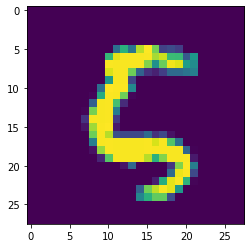

In [43]:
idimg = 2000

im =  train[0][idimg].reshape(-1, 28) #train[0] es una matriz,
#train[0][j] es un vector de longitud 784
#reshape(-1,28) significa crea una matriz de k x 28 tal que k*28=784
plt.imshow(im)#Plotealo como imagen.
print('clase: ', train[1][idimg])

train[1][k] guarda el número que representa el respectivo train[0][k].

------------------------------------------------

Implementación del descenso de gradiente.

Consideramos el tamaño de paso $\alpha_k=\frac{d_k^Td_k}{d_k^THd_k}$

*   Elemento de la lista
*   Elemento de la lista



In [87]:
def get_alpha_k(x,d,H):#Si tenemos H la matriz Hessiana.
    top=np.linalg.norm(d)
    bottom=np.dot(d,np.dot(H,d))
    return (top/bottom)

Nuestra función de descenso recibe una condición inicial $x_0$, la función a minimizar, el gradiente y Hessiano de la misma, y hay parámetros opcionales para tolerancia del gradiente y número máximo de iteraciones, así como un parámetro (False por default) que grafica el valor de $f(x_k)$ y $||g_k||$.

In [45]:
def Steepest_descent(x_0,f,grad_f,Hessian_f,tol_grad=10**(-6),max_iter=10**5,pr="False"):
    alpha_k=get_alpha_k(x=x_0,d=grad_f(x_0),H=Hessian_f(x_0))
    x_1=x_0-alpha_k*np.array(grad_f(x_0))#First iteration
    if(pr=='True'):
        F=[f(x_0)]
        G=[np.linalg.norm(grad_f(x_0))]
    x_0=x_1
    k=1
    norm_grad=np.linalg.norm(grad_f(x_1))
    #Cycle
    while(norm_grad>tol_grad and k<max_iter):#stop criteria
        k+=1
        alpha_k=get_alpha_k(x=x_0,d=grad_f(x_0),H=Hessian_f(x_0))
        x_1=x_0-alpha_k*np.array(grad_f(x_0))
        x_0=x_1
        norm_grad=np.linalg.norm(grad_f(x_1))
        if(pr=='True'):
            F.append(f(x_0))
            G.append(np.linalg.norm(grad_f(x_0)))
    if(k==max_iter):
        print("There wasnt convergence after "+str(max_iter)+" iterations.\nLast iteration: "+str(x_1),"   ","f(x_k)= ",str(f(x_1)))
    else:
        L=0
        plt.plot(range(L+1,len(F)),F[L:-1])
        plt.title("k vs. F(X_k)")   
        plt.show()         
        plt.plot(range(L+1,len(G)),G[L:-1])
        plt.title("k vs. ||g(X_k)||")   
        plt.show()
    print("iterations: ",k)
    return (x_1)

Definimos $f$, $\nabla f$ y $H_f$ para el problema.

Primero seleccionamos un subconjunto de los datos, tales que $y\in\{0,1\}$.

In [47]:
y=train[1][train[1]<2]
x=train[0][train[1]<2]

np.random.seed(0)
x=x[np.random.randint(0,len(x),100)]
np.random.seed(0)
y=y[np.random.randint(0,len(x),100)]
n=len(x)
x_plus=np.c_[x,np.ones(n)]

In [48]:
def common_exp(i,b,b_0):
    u=np.dot(x[i],b)
    return(np.exp(-u-b_0))

In [49]:
def h(b_and_b_0):
    b=b_and_b_0[0:-1]
    b_0=b_and_b_0[-1]
    suma=0
    for i in range(n):
        comm_exp=common_exp(i=i,b=b,b_0=b_0)
        if(y[i]==1):
            suma+=-np.log(1+comm_exp)
        else:
            suma+=np.dot(x[i],b)-np.log(1+comm_exp)
    return suma

In [50]:
def grad_h(b_and_b_0):
    b=b_and_b_0[:-1]
    b_0=b_and_b_0[-1]
    suma_g=np.zeros(len(b_and_b_0))
    for i in range(n):
        comm_exp=common_exp(i=i,b=b,b_0=b_0)
        if(y[i]==1):
            suma_g+=(comm_exp/(1+comm_exp))*x_plus[i]
        else:
            suma_g+=-(1/(1+comm_exp))*x_plus[i]
    return suma_g

In [51]:
def Hessian_h(b_and_b_0):
    b=b_and_b_0[:-1]
    b_0=b_and_b_0[-1]
    suma_h=np.zeros((len(b_and_b_0),len(b_and_b_0)))
    for i in range(n):
        comm_exp=common_exp(i=i,b=b,b_0=b_0)
        suma_h+=-(comm_exp)/((1+comm_exp)**2)*np.outer(x_plus[i],x_plus[i])
    return suma_h

In [53]:
import time

In [82]:
#subset(k)

loc_min4=Steepest_descent(x_0=loc_min3,f=h,grad_f=grad_h,Hessian_f=Hessian_h,tol_grad=0.001,max_iter=10,pr='True')
print("||g(x_k)||= ", np.linalg.norm(grad_h(loc_min1)))
print("||g(x_k)||= ", np.linalg.norm(grad_h(loc_min2)))
print("||g(x_k)||= ", np.linalg.norm(grad_h(loc_min3)))
print("||g(x_k)||= ", np.linalg.norm(grad_h(loc_min4)))
    

There wasnt convergence after 10 iterations.
Last iteration: [ 5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e

In [91]:
y=train[1][train[1]<2]
x=train[0][train[1]<2]

np.random.seed(0)
x=x[np.random.randint(0,len(x),200)]
np.random.seed(0)
y=y[np.random.randint(0,len(x),200)]
n=len(x)
x_plus=np.c_[x,np.ones(n)]
print("||g(x_k)||= ", np.linalg.norm(grad_h(loc_min4)))
loc_min11=Steepest_descent(x_0=loc_min10,f=h,grad_f=grad_h,Hessian_f=Hessian_h,tol_grad=0.001,max_iter=300,pr='True')
print("||g(x_k)||= ", np.linalg.norm(grad_h(loc_min5)))
print("||g(x_k)||= ", np.linalg.norm(grad_h(loc_min6)))
print("||g(x_k)||= ", np.linalg.norm(grad_h(loc_min7)))
print("||g(x_k)||= ", np.linalg.norm(grad_h(loc_min8)))
print("||g(x_k)||= ", np.linalg.norm(grad_h(loc_min9)))
print("||g(x_k)||= ", np.linalg.norm(grad_h(loc_min10)))
print("||g(x_k)||= ", np.linalg.norm(grad_h(loc_min11)))

||g(x_k)||=  142.5736937885984
There wasnt convergence after 300 iterations.
Last iteration: [ 5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-

In [96]:
y=train[1][train[1]<2]
x=train[0][train[1]<2]

np.random.seed(0)
x=x[np.random.randint(0,len(x),500)]
np.random.seed(0)
y=y[np.random.randint(0,len(x),500)]
n=len(x)
x_plus=np.c_[x,np.ones(n)]
print("||g(x_k)||= ", np.linalg.norm(grad_h(loc_min11)))
loc_min15=Steepest_descent(x_0=loc_min15,f=h,grad_f=grad_h,Hessian_f=Hessian_h,tol_grad=0.001,max_iter=100,pr='True')
print("||g(x_k)||= ", np.linalg.norm(grad_h(loc_min12)))
print("||g(x_k)||= ", np.linalg.norm(grad_h(loc_min13)))
print("||g(x_k)||= ", np.linalg.norm(grad_h(loc_min14)))
print("||g(x_k)||= ", np.linalg.norm(grad_h(loc_min15)))

||g(x_k)||=  164.44070090761113
There wasnt convergence after 100 iterations.
Last iteration: [ 5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e

In [111]:
y=train[1][train[1]<2]
x=train[0][train[1]<2]

np.random.seed(0)
x=x[np.random.randint(0,len(x),1000)]
np.random.seed(0)
y=y[np.random.randint(0,len(x),1000)]
n=len(x)
x_plus=np.c_[x,np.ones(n)]
print("||g(x_k)||= ", np.linalg.norm(grad_h(loc_min15)))
loc_min20=Steepest_descent(x_0=loc_min19,f=h,grad_f=grad_h,Hessian_f=Hessian_h,tol_grad=0.001,max_iter=400,pr='True')
print("||g(x_k)||= ", np.linalg.norm(grad_h(loc_min16)))#100. 3m
print("||g(x_k)||= ", np.linalg.norm(grad_h(loc_min17)))#200. 5.5m
print("||g(x_k)||= ", np.linalg.norm(grad_h(loc_min18)))#600
print("||g(x_k)||= ", np.linalg.norm(grad_h(loc_min19)))#600.10.1m
print("||g(x_k)||= ", np.linalg.norm(grad_h(loc_min20)))#600

||g(x_k)||=  179.51706995719536
There wasnt convergence after 400 iterations.
Last iteration: [ 5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e

In [117]:
y=train[1][train[1]<2]
x=train[0][train[1]<2]

np.random.seed(0)
x=x[np.random.randint(0,len(x),2000)]
np.random.seed(0)
y=y[np.random.randint(0,len(x),2000)]
n=len(x)
x_plus=np.c_[x,np.ones(n)]
print("||g(x_k)||= ", np.linalg.norm(grad_h(loc_min20)))
loc_min26=Steepest_descent(x_0=loc_min25,f=h,grad_f=grad_h,Hessian_f=Hessian_h,tol_grad=0.001,max_iter=100,pr='True')
print("||g(x_k)||= ", np.linalg.norm(grad_h(loc_min21)))#100. 5m
print("||g(x_k)||= ", np.linalg.norm(grad_h(loc_min22)))#200. 11
print("||g(x_k)||= ", np.linalg.norm(grad_h(loc_min23)))#200. 10
print("||g(x_k)||= ", np.linalg.norm(grad_h(loc_min24)))#200. 10
print("||g(x_k)||= ", np.linalg.norm(grad_h(loc_min25)))#400. 20
print("||g(x_k)||= ", np.linalg.norm(grad_h(loc_min26)))#400. 20

||g(x_k)||=  240.4041727423362
There wasnt convergence after 100 iterations.
Last iteration: [ 0.05        0.05        0.05        0.05        0.05        0.05
  0.05        0.05        0.05        0.05        0.05        0.05
  0.05        0.05        0.05        0.05        0.05        0.05
  0.05        0.05        0.05        0.05        0.05        0.05
  0.05        0.05        0.05        0.05        0.05        0.05
  0.05        0.05        0.05        0.05        0.05        0.05
  0.05        0.05        0.05        0.05        0.05        0.05
  0.05        0.05        0.05        0.05        0.05        0.05
  0.05        0.05        0.05        0.05        0.05        0.05
  0.05        0.05        0.05        0.05        0.05        0.24065432
  0.11574287  0.05        0.04994286  0.04998252  0.05        0.05
  0.05        0.05        0.05        0.05       -0.02716071 -0.17004907
  0.22724482  0.08993331  0.1670645   0.30313947  0.11003308  0.05
  0.05        0.05      

In [125]:
y=train[1][train[1]<2]
x=train[0][train[1]<2]

np.random.seed(0)
x=x[np.random.randint(0,len(x),5000)]
np.random.seed(0)
y=y[np.random.randint(0,len(x),5000)]
n=len(x)
x_plus=np.c_[x,np.ones(n)]
print("||g(x_k)||= ", np.linalg.norm(grad_h(loc_min26)))
loc_min27=Steepest_descent(x_0=loc_min26,f=h,grad_f=grad_h,Hessian_f=Hessian_h,tol_grad=0.001,max_iter=100,pr='True')
print("||g(x_k)||= ", np.linalg.norm(grad_h(loc_min27)))

||g(x_k)||=  446.10075071648754
There wasnt convergence after 100 iterations.
Last iteration: [ 5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e

In [121]:
np.linalg.norm(grad_h(loc_min25))

19421.69620890011

In [61]:
bbb=np.loadtxt("b_100.txt",skiprows=1)

In [68]:
print("||g(x_k)||= ", np.linalg.norm(grad_h(bbb)))

||g(x_k)||=  119.30284843156899


In [127]:
#Guardar la solucion
for u in range(len([loc_min4,loc_min11,loc_min15,loc_min20,loc_min26])):
    fo = open(f"b_checkpoints"+str(u)+".txt", "w")
    fo.write(str(785)+"\n")#Add size
    np.savetxt(fo, [loc_min4,loc_min11,loc_min15,loc_min20,loc_min26][u], fmt='%1.9e', comments='')
    fo.close()

In [128]:
fo = open(f"b_checkpoints"+str(5)+".txt", "w")
fo.write(str(785)+"\n")#Add size
np.savetxt(fo, loc_min27, fmt='%1.9e', comments='')
fo.close()